In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/saforem2/ambivalent opinionated

  Cloning https://github.com/saforem2/ambivalent to /tmp/pip-req-build-id_x78pg
  Running command git clone --filter=blob:none --quiet https://github.com/saforem2/ambivalent /tmp/pip-req-build-id_x78pg
  Resolved https://github.com/saforem2/ambivalent to commit e130acf2ae471b2a4768dcb48e680187ce6bb716
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.8/697.8 kB 38.5 MB/s eta 0:00:00
  Created wheel for ambivalent: filename=ambivalent-0.0.1-py3-none-any.whl size=13747 sha256=a76cb174333146f992da27103d7a676dda07462c4ac7dfc12e6a6b437073fa43
  Stored in directory: /tmp/pip-ephem-wheel-cache-8vpu_3l1/wheels/7b/e6/96/887dca4e5d3c307c41d4cf84d23f97791a334efab8f1163d30
Successfully built ambivalent


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import xarray as xr

import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from ambivalent import STYLES
import opinionated

Failed to download font: IBM Plex Sans, skipping!
Failed to download font: IBM Plex Sans Condensed, skipping!
Failed to download font: IBM Plex Serif, skipping!
Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fi

In [ ]:
plt.style.use(STYLES['ambivalent'])
plt.style.use("dark_background")

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Itapua/datos_itapua.csv', parse_dates=['fecha'])

In [ ]:
df = df[(df['fecha'] >= '2017-01-01') & (df['fecha'] <= '2018-12-31')]

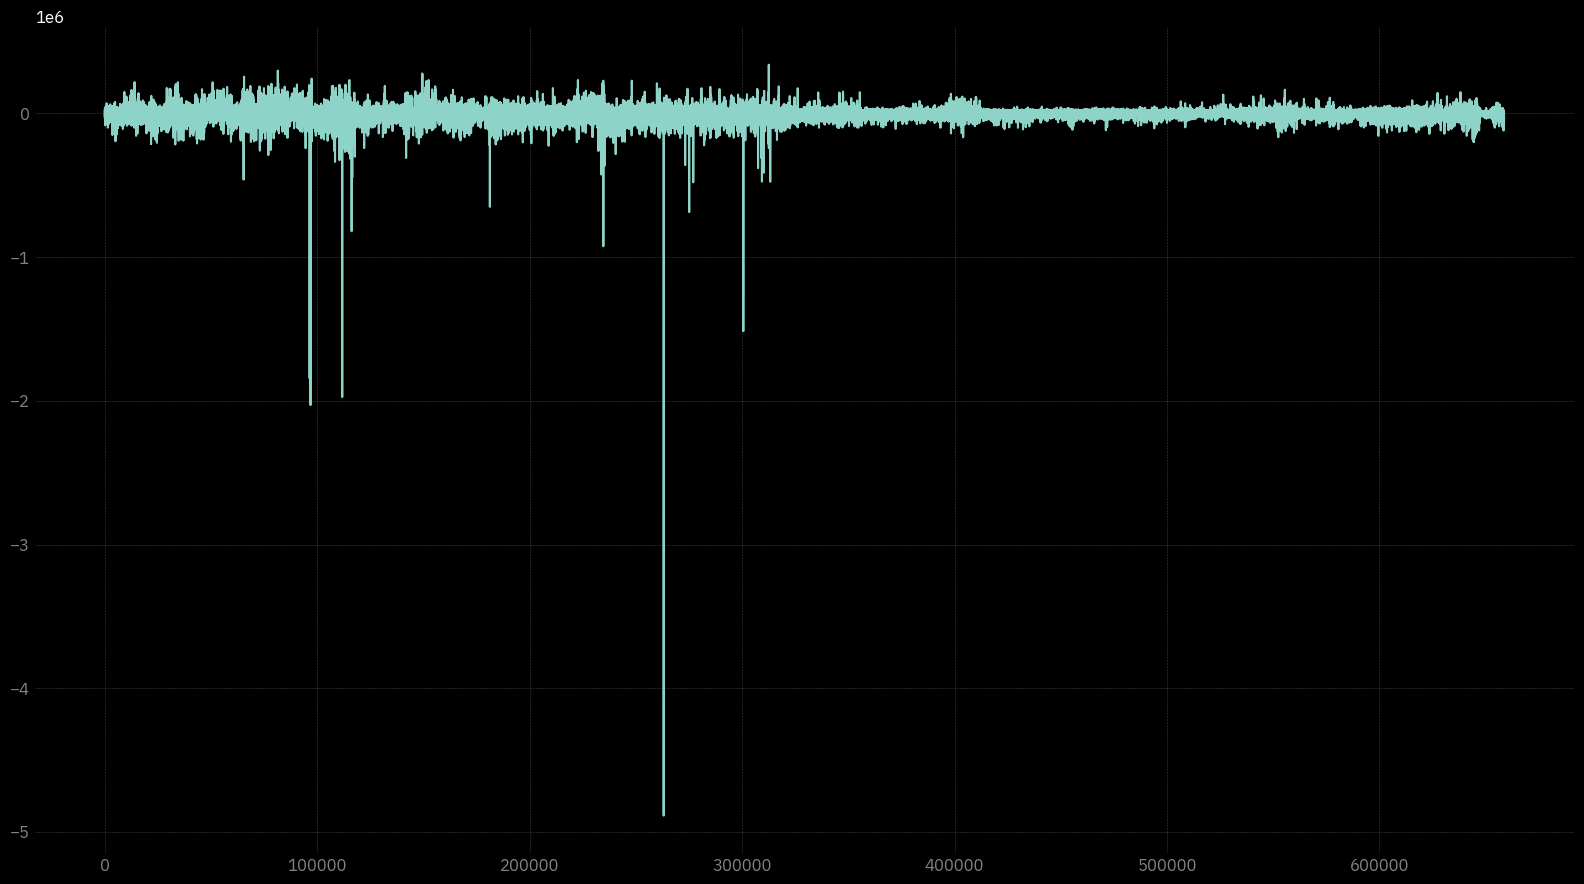

In [ ]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(16,9))
df['peakcurrent'].plot()
plt.tight_layout()
plt.show()

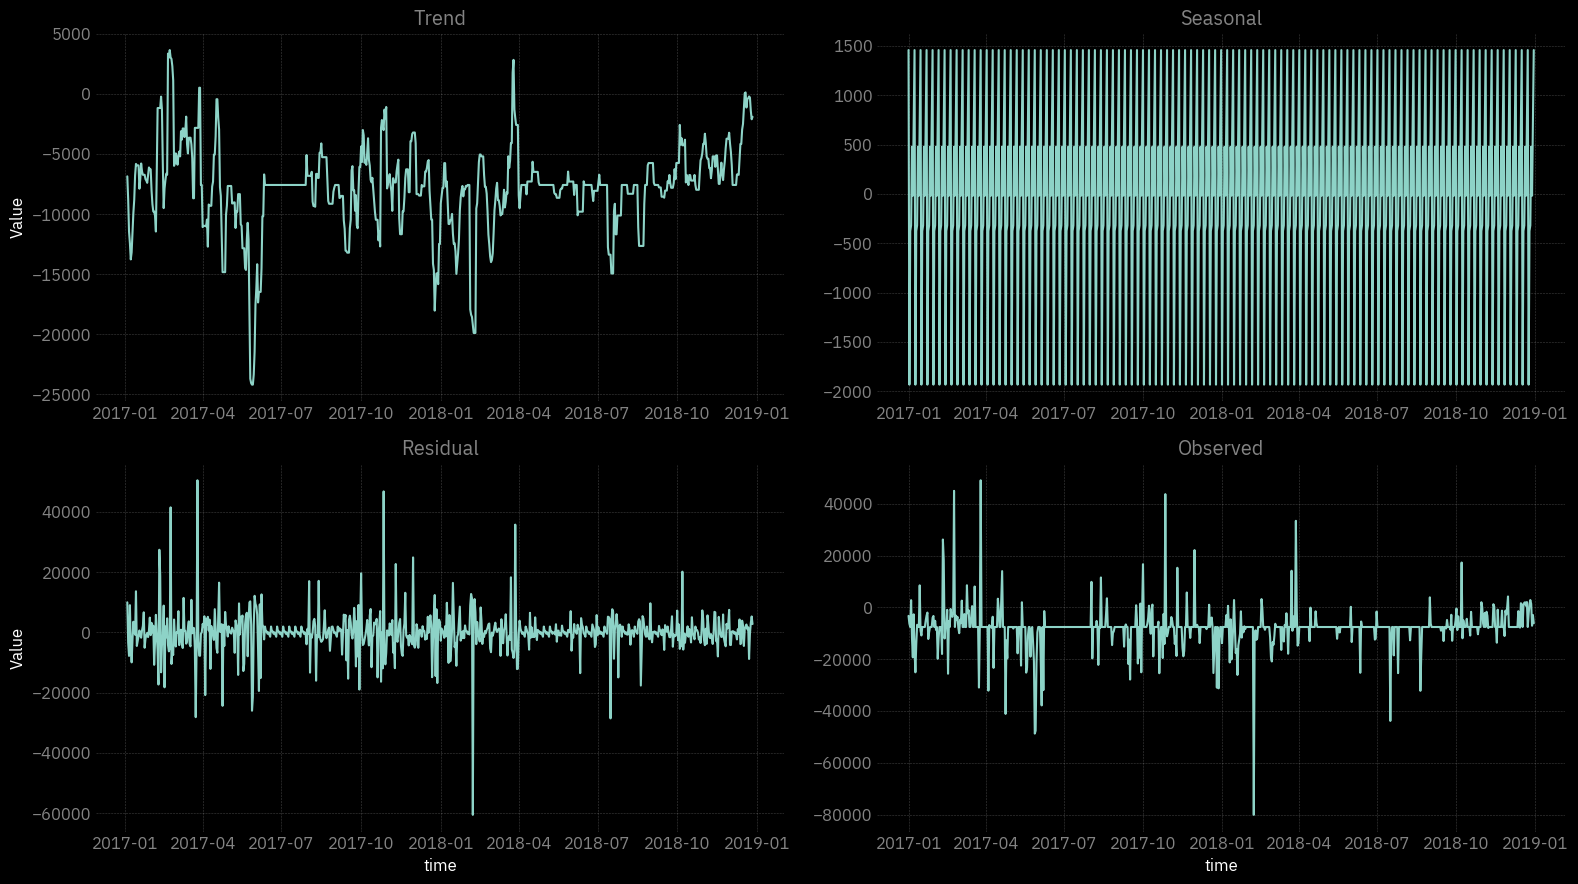

In [ ]:
vars = {'peakcurrent'}
df['fecha'] = pd.to_datetime(df['fecha'])
# Establecer la columna 'fecha' como el índice del DataFrame

df.set_index('fecha', inplace=True)

df_d = df.resample('1d').mean()

median = df_d["peakcurrent"].median()
df_d['peakcurrent'] = df_d['peakcurrent'].fillna(median)

for var in df.columns:
  result = sm.tsa.seasonal_decompose(df_d[var], model='additive')
  results_df = pd.DataFrame({'trend': result.trend, 'seasonal': result.seasonal, 'resid': result.resid, 'observed': result.observed})
  fig, ax = plt.subplots(ncols = 2, nrows = 2,figsize=(16,9))
  ax[0,0].plot(df_d.index, results_df.trend)
  #ax[0,0].set_title(title)
  ax[0,0].set_title('Trend')
  ax[0,0].set_ylabel('Value')

  ax[0,1].plot(df_d.index, results_df.seasonal)
  ax[0,1].set_title('Seasonal')

  ax[1,0].plot(df_d.index, results_df.resid)
  ax[1,0].set_title('Residual')
  ax[1,0].set_ylabel('Value')
  ax[1,0].set_xlabel('time')

  ax[1,1].plot(df_d.index, results_df.observed)
  ax[1,1].set_title('Observed')
  ax[1,1].set_xlabel('time')


  plt.tight_layout()
  plt.savefig(f'Seasonal_{var}.png')
  plt.show()